### Project Overview

* Problem Type: Binary Classification.

* Goal: The objective is to build a predictive model that determines whether a customer will cancel their hotel booking. By identifying bookings at risk of cancellation, Hotel Haven can optimize inventory management and implement retention strategies.

* Target Variable: booking status (Classes: Canceled, Not_Canceled).

* Evaluation Strategy: The Prediction deals with imbalanced classes (fewer cancellations than stays), will focus on F1-Score, Precision, and Recall alongside Accuracy. Will also use the ROC-AUC score to evaluate the model's ability to distinguish between classes.

In [173]:
# Import necessary libraries
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Preprocessing & Selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.impute import SimpleImputer

# Machine Learning - Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Machine Learning - Evaluation
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report, 
                             roc_curve, roc_auc_score)

# Configuration
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
np.random.seed(42)


print("Libraries imported and configuration set.")

Libraries imported and configuration set.


In [174]:
# Load the dataset
df = pd.read_csv("booking.csv")

# Display basic info
print("First 5 rows:")
display(df.head())

print(f"\nShape of dataset: {df.shape}")
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:")
print(df.dtypes)

First 5 rows:


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled



Shape of dataset: (36285, 17)

Column Names: ['Booking_ID', 'number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'type of meal', 'car parking space', 'room type', 'lead time', 'market segment type', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests', 'date of reservation', 'booking status']

Data Types:
Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object


## Dataset Overview

### 🔹 Shape of the Dataset
The dataset contains **36,285 records** and **17 features**, providing a sufficiently large sample for building and evaluating machine learning models.

---

### 🔹 Column Descriptions
The dataset includes the following variables:

- **Booking_ID** – Unique identifier for each reservation  
- **number of adults** – Number of adults included in the booking  
- **number of children** – Number of children included in the booking  
- **number of weekend nights** – Number of weekend nights stayed  
- **number of week nights** – Number of weekday nights stayed  
- **type of meal** – Meal plan selected by the customer  
- **car parking space** – Indicates whether a parking space was required  
- **room type** – Type/category of room booked  
- **lead time** – Number of days between booking date and arrival date  
- **market segment type** – Booking market segment (e.g., online, offline, corporate)  
- **repeated** – Indicates whether the guest is a repeated customer  
- **P-C** – Number of previous bookings that were canceled  
- **P-not-C** – Number of previous bookings that were not canceled  
- **average price** – Average price per room for the booking  
- **special requests** – Number of special requests made by the customer  
- **date of reservation** – Date on which the booking was made  
- **booking status** – Target variable indicating whether the booking was canceled or not

---

### 🔹 Data Types Summary
The dataset contains a mix of numerical, categorical, and date features:

- **Categorical (object):**
  - Booking_ID
  - type of meal
  - room type
  - market segment type
  - date of reservation *(to be converted to datetime)*
  - booking status *(target variable)*

- **Numerical (int64):**
  - number of adults
  - number of children
  - number of weekend nights
  - number of week nights
  - car parking space
  - lead time
  - repeated
  - P-C
  - P-not-C
  - special requests

- **Numerical (float64):**
  - average price

---

### 🔹 Initial Observations
- The presence of both numerical and categorical variables makes this dataset suitable for **classification modeling**.
- The **`date of reservation`** column should be converted to a datetime format for feature extraction.
- **`booking status`** will be treated as the **target variable**.
- Feature scaling will be required for price-related and count-based variables.
- Encoding techniques will be applied to categorical features prior to model training.


In [175]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


##  Descriptive Statistics of Numerical Features

The table below summarizes the key statistical properties of the numerical variables in the dataset, including measures of central tendency, dispersion, and range.



### General Observations
* All numerical features contain **36,285 observations**, indicating **no missing values** in these columns.
* The dataset includes a mix of **count-based**, **binary**, and **continuous** variables, which will influence preprocessing and modeling decisions.

### Feature-Level Insights

#### Guest Composition
 * Number of adults**
   Mean: ~1.85, Median: 2  
   Most bookings are made for **two adults**, indicating a common travel pattern.
* Number of children**
* Mean: ~0.11, Median: 0  
* The majority of bookings **do not include children**, with a few large-family outliers.


#### Stay Duration
* Number of weekend nights**
* Median: 1, Max: 7  
* Number of week nights**
* Median: 2, Max: 17  
* Weeknight stays tend to be **longer and more variable** than weekend stays.

#### Amenities & Customer Type
* Car parking space**
* Mean: ~0.03  
* This is a **binary variable**, with very few customers requiring parking.
* Repeated**

* Mean: ~0.03  
* Indicates that **repeat customers are relatively rare** in the dataset.

####  Booking Behavior
*Lead time**
* Mean: ~85 days, Median: 57 days  
* High standard deviation suggests **wide variation** in booking advance times.
* Maximum lead time of 443 days indicates very early bookings.
    
####  Booking History
* P-C (previous cancellations)**

* Median: 0, Max: 13  
*P-not-C (previous non-canceled bookings)**
* Median: 0, Max: 58  
* Most customers have **no prior booking history**, but a few exhibit strong repeat behavior.

####  Pricing
* Average price**
* Mean: ~103.4, Median: ~99.5  
* The large maximum value (540) suggests **potential outliers**, which may require capping or transformation.

####  Special Requests
* Special requests**
* Median: 0, Max: 5  
* Most bookings do not include special requests, though some customers make multiple requests.


###  Modeling Implications
* Several features (e.g., **average price**, **lead time**, **P-not-C**) show **high variance and outliers**, warranting outlier treatment.
* Binary and count-based variables should be treated carefully during scaling.
* Feature scaling and transformation will be applied before model training to ensure balanced learning.


In [176]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

Missing values per column:
 Series([], dtype: int64)


##  Missing Values Analysis

An inspection of the dataset shows that **there are no missing values in any of the columns**.





In [177]:
# Check for duplicates
duplicates = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


## Duplicate Records Check

The dataset was examined for duplicate rows, and **no duplicate observations were found**.



In [178]:
# Drop the 'Booking_ID' column
df.drop('Booking_ID', axis=1, inplace=True)

# Verify the column is gone
print("Columns after dropping Booking_ID:")
print(df.columns.tolist())

Columns after dropping Booking_ID:
['number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'type of meal', 'car parking space', 'room type', 'lead time', 'market segment type', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests', 'date of reservation', 'booking status']


In [179]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [180]:
# Convert date_of_reservation to datetime, handling potential errors
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')

# Drop rows where date conversion failed (if any)
df = df.dropna(subset=['date of reservation'])

# Extract features
df['reservation_year'] = df['date of reservation'].dt.year
df['reservation_month'] = df['date of reservation'].dt.month
df['reservation_day'] = df['date of reservation'].dt.day
df['reservation_dow'] = df['date of reservation'].dt.dayofweek  # 0=Monday, 6=Sunday

# Drop original date column and Booking_ID (unique ID not useful for prediction)
df.drop(['date of reservation'], axis=1, inplace=True)

print("Date features extracted and original column dropped.")
display(df.head(3))

Date features extracted and original column dropped.


,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,reservation_year,reservation_month,reservation_day,reservation_dow
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,2015,10,2,4
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018,11,6,1
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,2018,2,28,2


##  Date Feature Engineering

In this step, the **`date of reservation`** column is transformed into a proper datetime format and decomposed into meaningful temporal features that can improve model performance.

---

### 🔹 Datetime Conversion
The `date of reservation` column is converted to a datetime object using `pd.to_datetime`.  


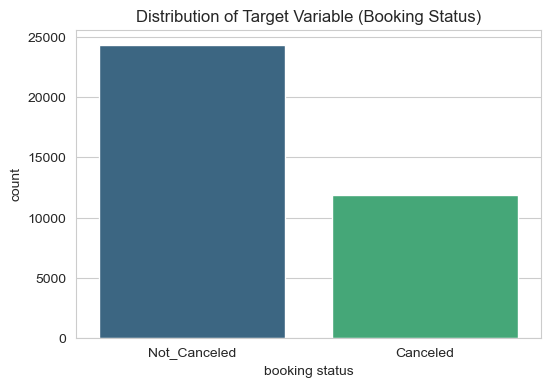

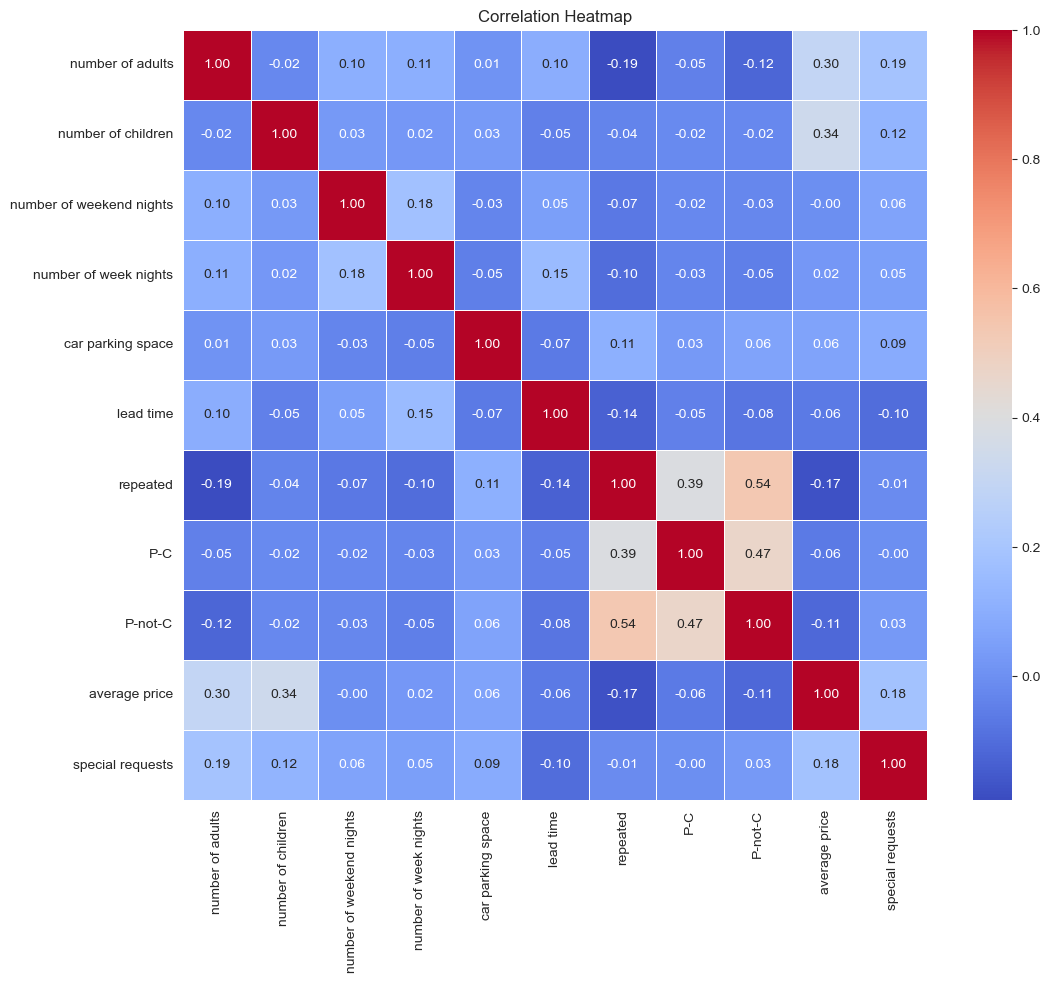

In [181]:
# Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='booking status', data=df, palette='viridis')
plt.title('Distribution of Target Variable (Booking Status)')
plt.show()

# Correlation Heatmap (Numerical features only)
plt.figure(figsize=(12, 10))
numerical_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [182]:
# Target variable count
target_counts = df['booking status'].value_counts()

# Target variable percentage
target_percentages = df['booking status'].value_counts(normalize=True) * 100

# Combine into a single table
target_distribution = pd.DataFrame({
    'Count': target_counts,
    'Percentage (%)': target_percentages.round(2)
})

target_distribution


,Count,Percentage (%)
booking status,,
Not_Canceled,24366,67.22
Canceled,11882,32.78


## 🔗 Correlation Analysis (Numerical Features)

The table above presents the **Pearson correlation matrix** for all numerical variables in the dataset. Correlation values range from **-1 to +1**, where values closer to ±1 indicate stronger linear relationships, and values near 0 indicate weak or no linear relationship.

---

### 🔹 Overall Observations
- Most feature pairs show **weak to moderate correlations**, suggesting **low multicollinearity**.
- This is beneficial for machine learning models, especially linear models, as it reduces redundancy among features.

---

### 🔹 Notable Positive Correlations
- **Repeated ↔ P-not-C (0.54)**  
  Strong positive relationship indicating that repeat customers tend to have more previous non-canceled bookings.
  
- **Repeated ↔ P-C (0.39)**  
  Suggests that repeat customers also have a history of cancellations, reflecting higher engagement rather than behavior quality alone.

- **P-C ↔ P-not-C (0.47)**  
  Indicates customers with booking history tend to have both canceled and non-canceled past bookings.

- **Average price ↔ Number of children (0.34)**  
  Higher prices are moderately associated with bookings that include children, possibly due to larger room requirements.

- **Average price ↔ Number of adults (0.30)**  
  Suggests room pricing increases with the number of adults.

---

### 🔹 Moderate Relationships
- **Number of week nights ↔ Lead time (0.15)**  
  Longer stays are often booked further in advance.
  
- **Weekend nights ↔ Week nights (0.18)**  
  Indicates a mild association between weekend and weekday stay durations.

---

### 🔹 Weak or Negligible Correlations
- **Car parking space** shows weak correlations with most features, indicating it is largely independent.
- **Special requests** have low correlations across variables, suggesting they capture unique customer behavior.
- **Lead time** has generally weak correlations, implying independent booking timing behavior.

---

### 🔹 Modeling Implications
- The absence of extremely high correlations (> 0.8) reduces the need for aggressive feature elimination.
- Features such as **average price**, **lead time**, **booking history variables**, and **stay duration** are likely to provide complementary information.
- All numerical features can be retained for modeling, with further importance determined during feature selection techniques such as **Mutual Information** or **model-based importance**.


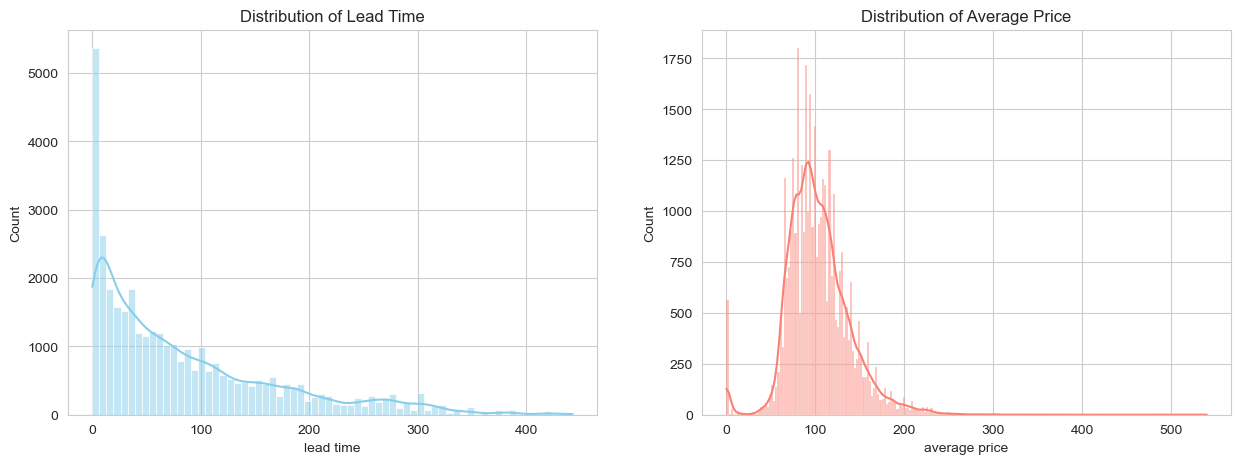

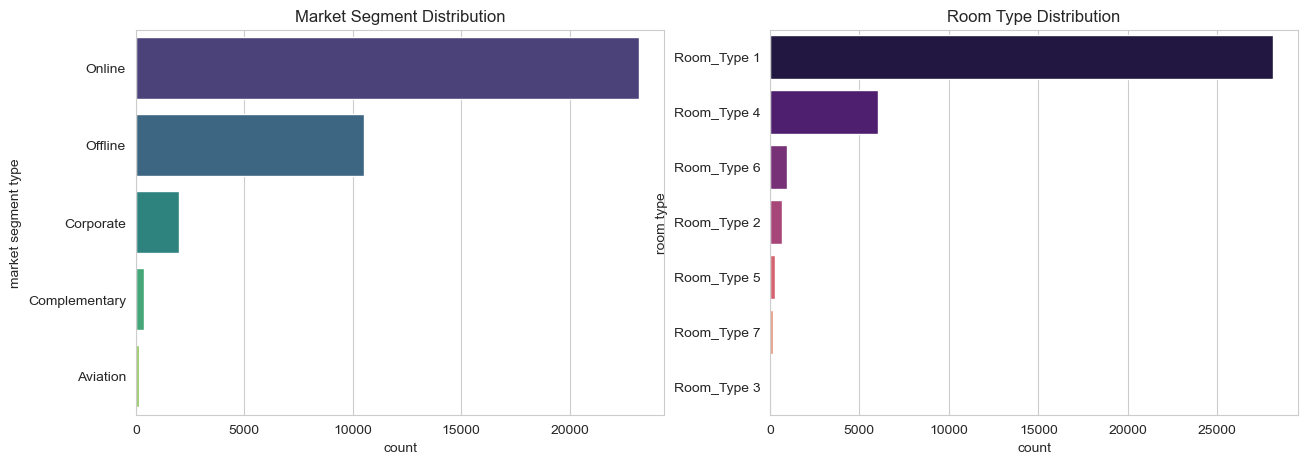

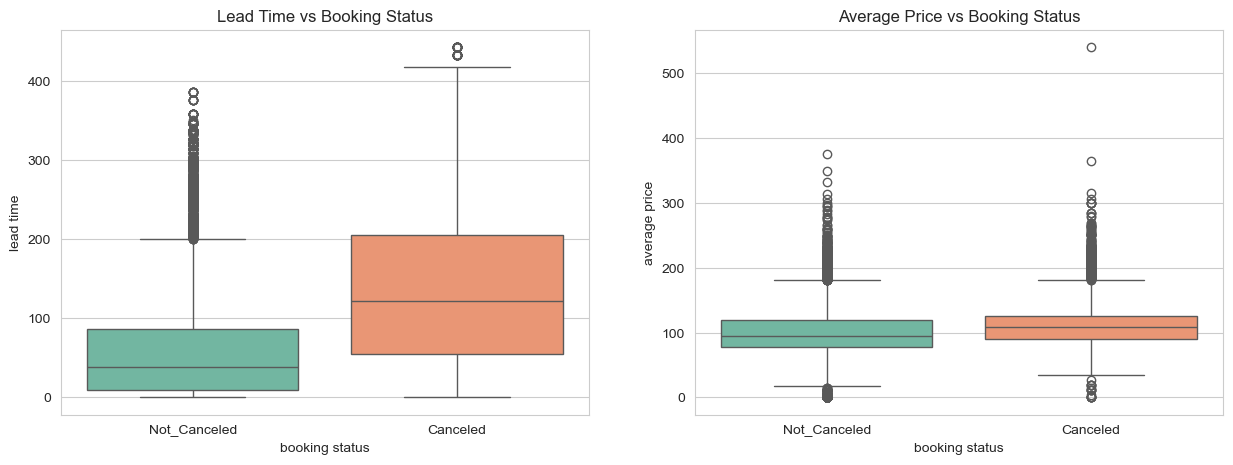

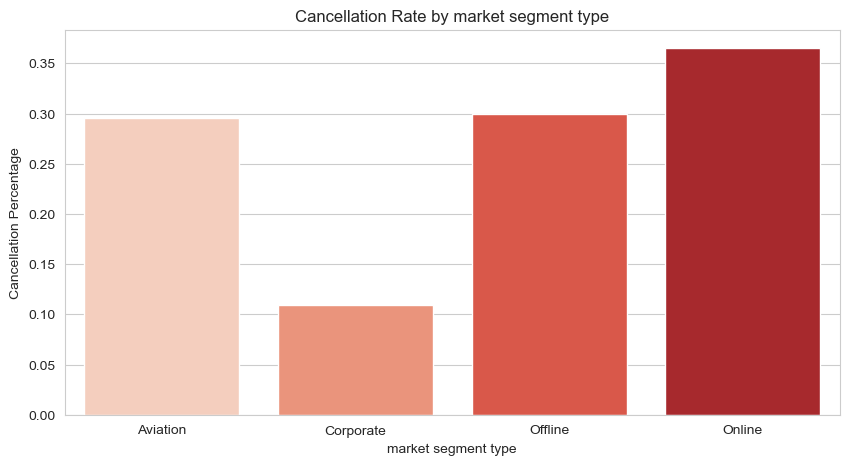

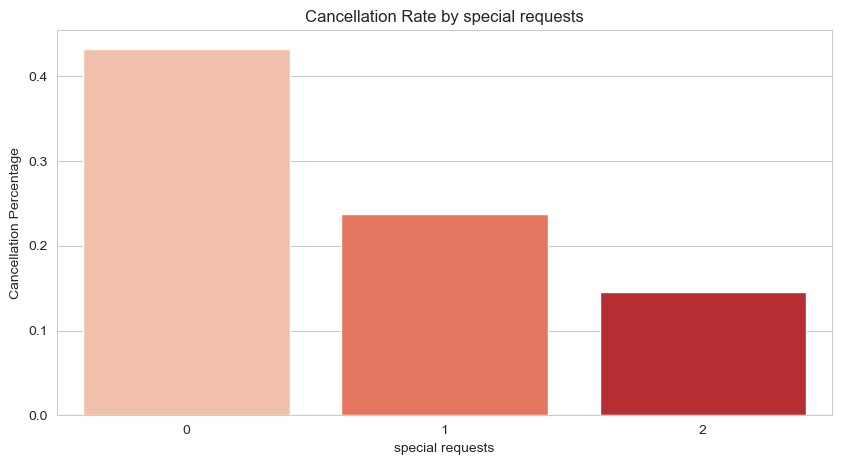

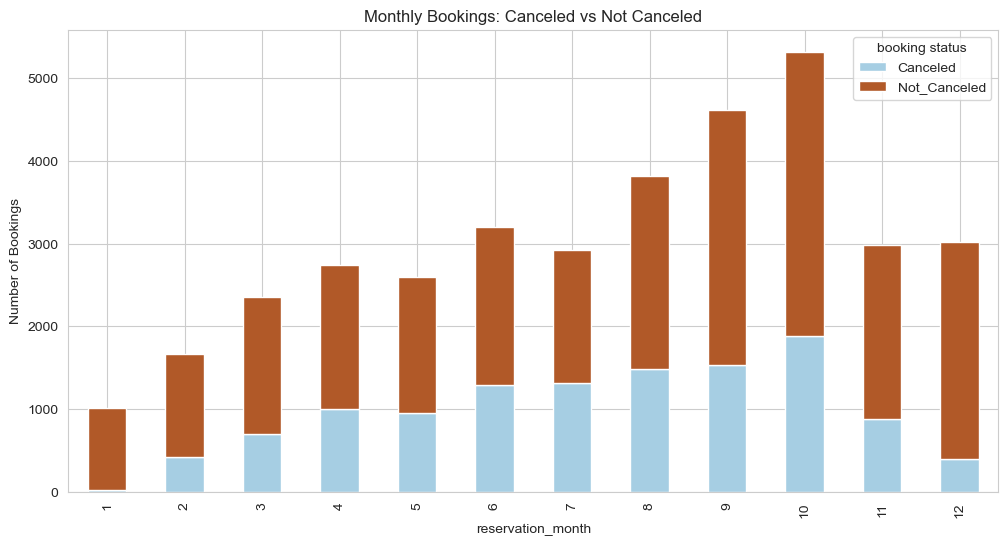

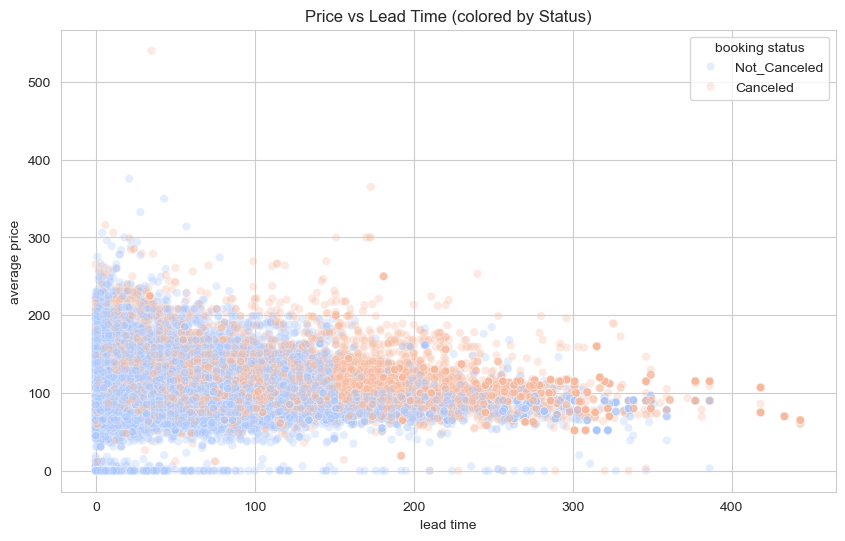

In [185]:

# 1. Numerical Distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['lead time'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Lead Time')
sns.histplot(df['average price'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Average Price')
plt.show()

# 2. Categorical Counts
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(y='market segment type', data=df, order=df['market segment type'].value_counts().index, ax=axes[0], palette='viridis')
axes[0].set_title('Market Segment Distribution')
sns.countplot(y='room type', data=df, order=df['room type'].value_counts().index, ax=axes[1], palette='magma')
axes[1].set_title('Room Type Distribution')
plt.show()

# 3. Target vs Numerical (Boxplots)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x='booking status', y='lead time', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Lead Time vs Booking Status')
sns.boxplot(x='booking status', y='average price', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Average Price vs Booking Status')
plt.show()

# 4. Target vs Categorical (Cancellation Rates)
# Helper function to plot cancellation rate
def plot_cancellation_rate(feature):
    temp = df.groupby(feature)['booking status'].value_counts(normalize=True).rename('percentage').reset_index()
    temp = temp[temp['booking status'] == 'Canceled']
    plt.figure(figsize=(10, 5))
    sns.barplot(x=feature, y='percentage', data=temp, palette='Reds')
    plt.title(f'Cancellation Rate by {feature}')
    plt.ylabel('Cancellation Percentage')
    plt.show()

plot_cancellation_rate('market segment type')
plot_cancellation_rate('special requests')

# 5. Temporal Analysis (Seasonality)
monthly_counts = df.groupby('reservation_month')['booking status'].value_counts().unstack()
monthly_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired')
plt.title('Monthly Bookings: Canceled vs Not Canceled')
plt.ylabel('Number of Bookings')
plt.show()

# 6. Multivariate (Price vs Lead Time by Status)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lead time', y='average price', hue='booking status', data=df, alpha=0.3, palette='coolwarm')
plt.title('Price vs Lead Time (colored by Status)')
plt.show()


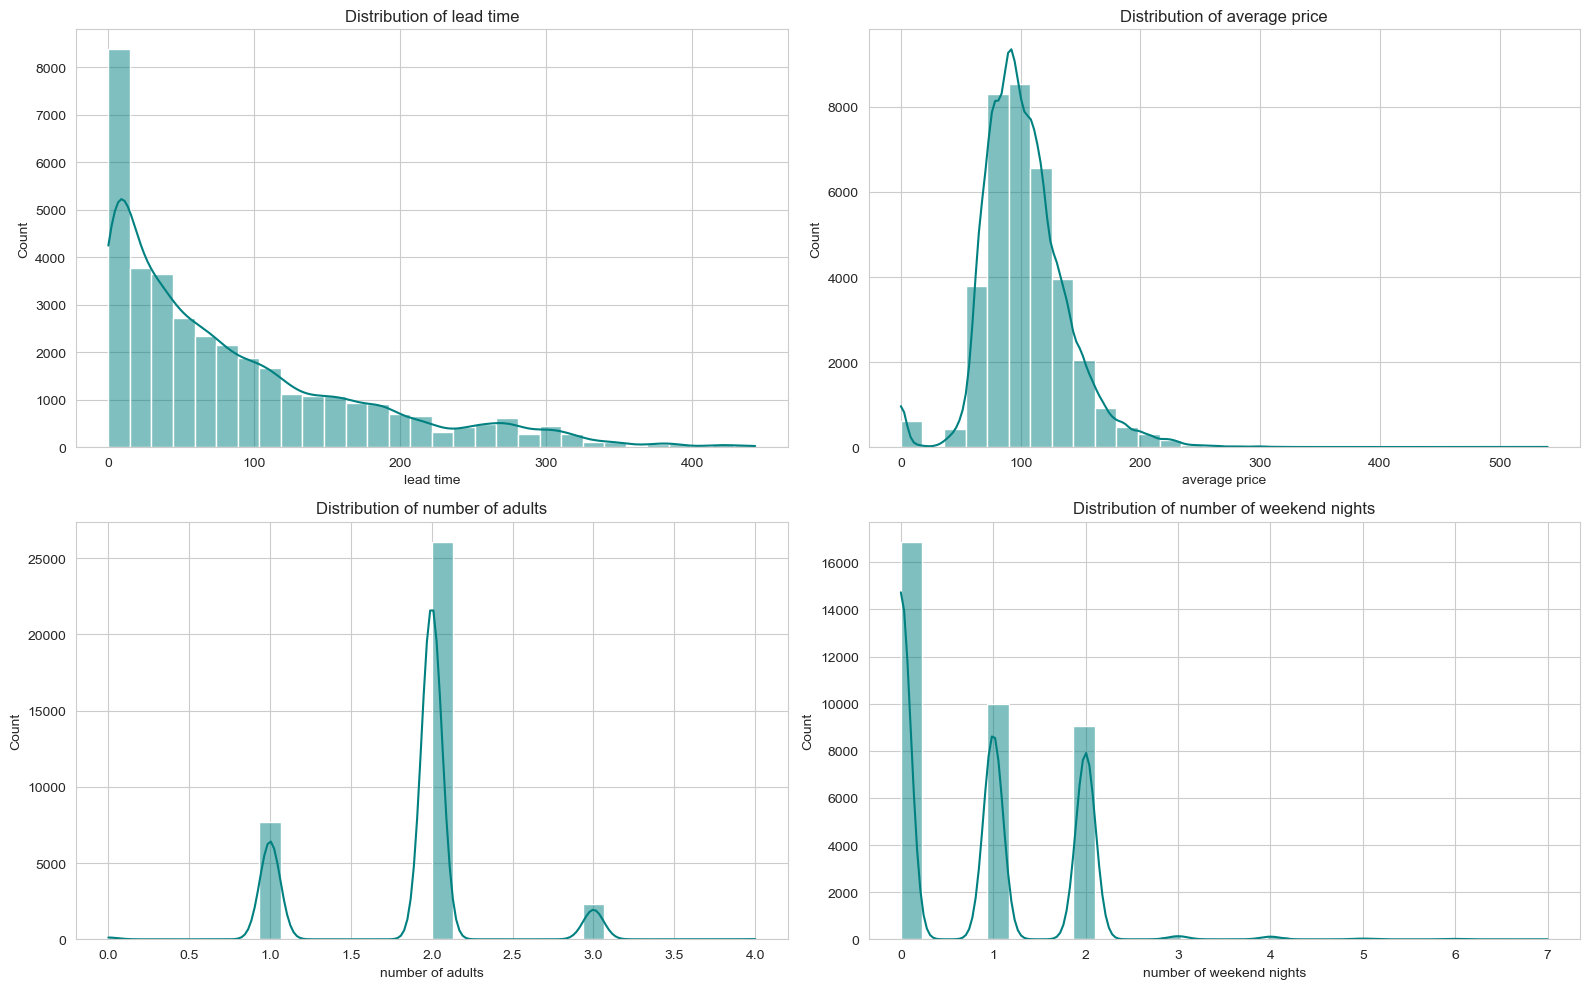

In [187]:
# Create a dashboard of numerical distributions
numerical_cols = ['lead time', 'average price', 'number of adults', 'number of weekend nights']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

for i, col in enumerate(numerical_cols):
    row, col_idx = i // 2, i % 2
    sns.histplot(df[col], kde=True, ax=axes[row, col_idx], color='teal', bins=30)
    axes[row, col_idx].set_title(f'Distribution of {col}', fontsize=12)

plt.tight_layout()
plt.show()

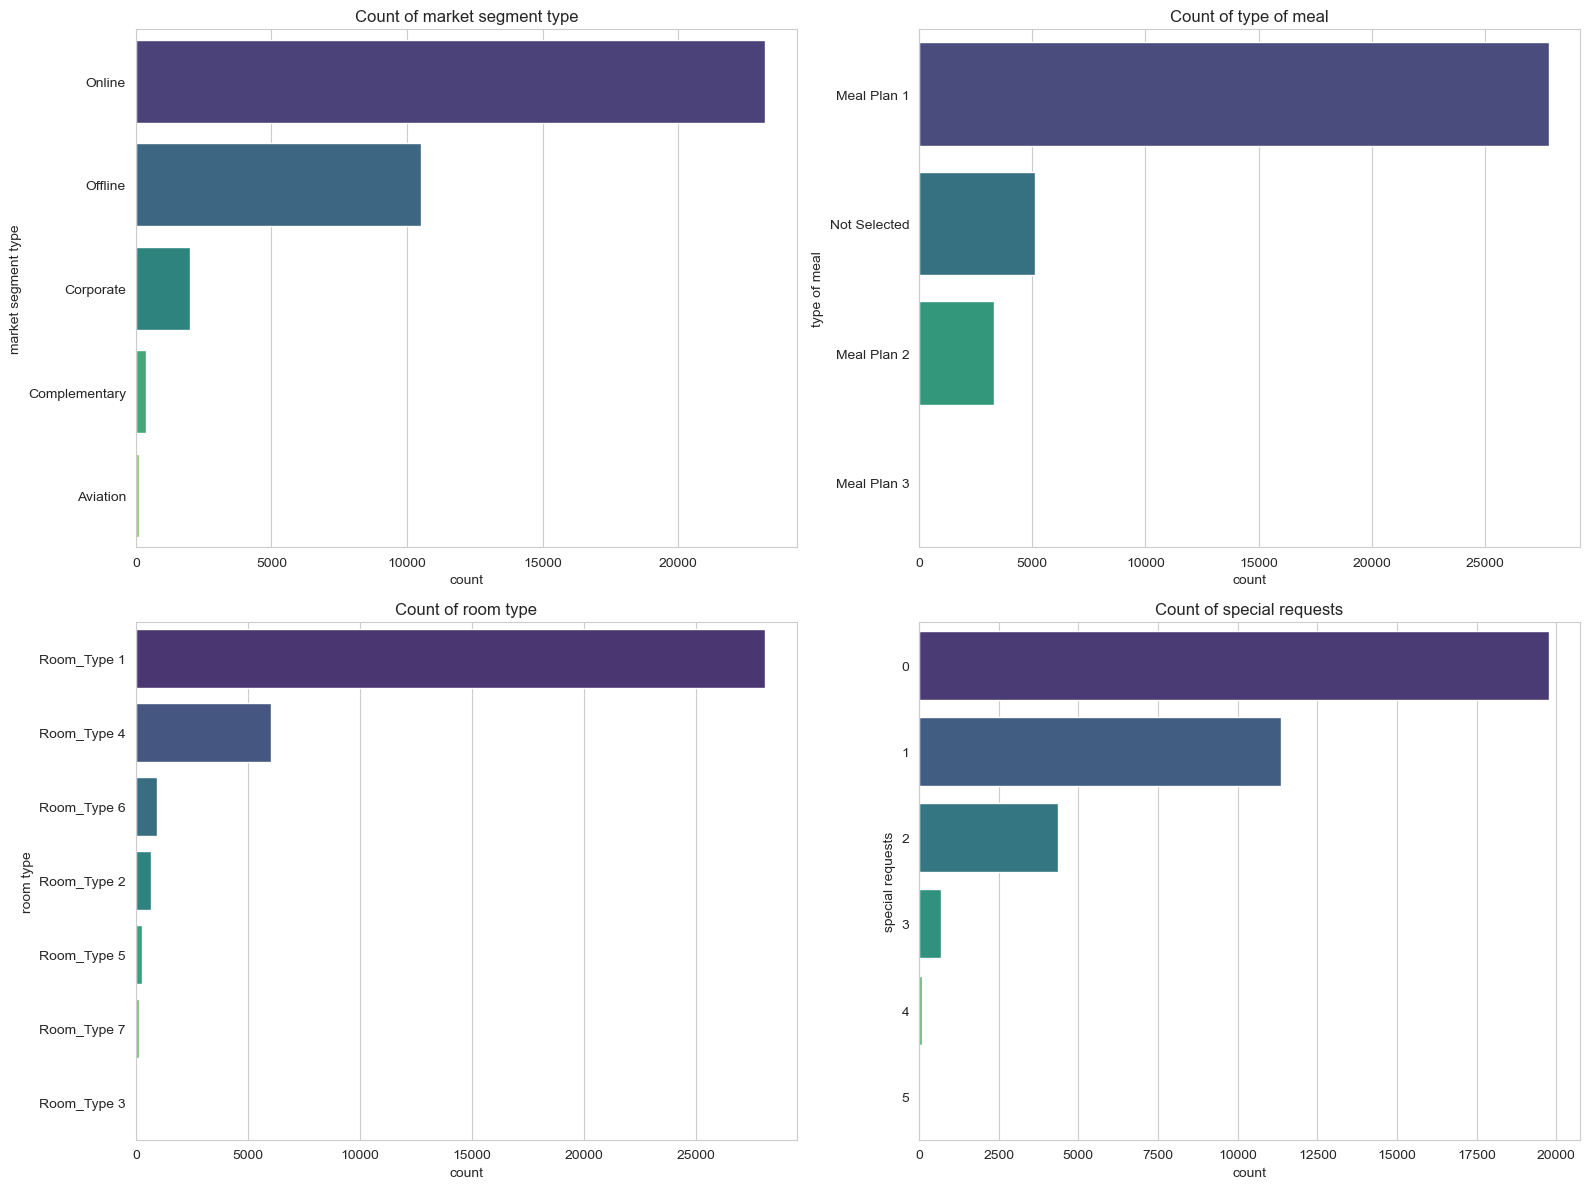

In [188]:
categorical_cols = ['market segment type', 'type of meal', 'room type', 'special requests']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for i, col in enumerate(categorical_cols):
    row, col_idx = i // 2, i % 2
    # Countplot with order sorted by frequency
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, ax=axes[row, col_idx], palette='viridis')
    axes[row, col_idx].set_title(f'Count of {col}', fontsize=12)

plt.tight_layout()
plt.show()


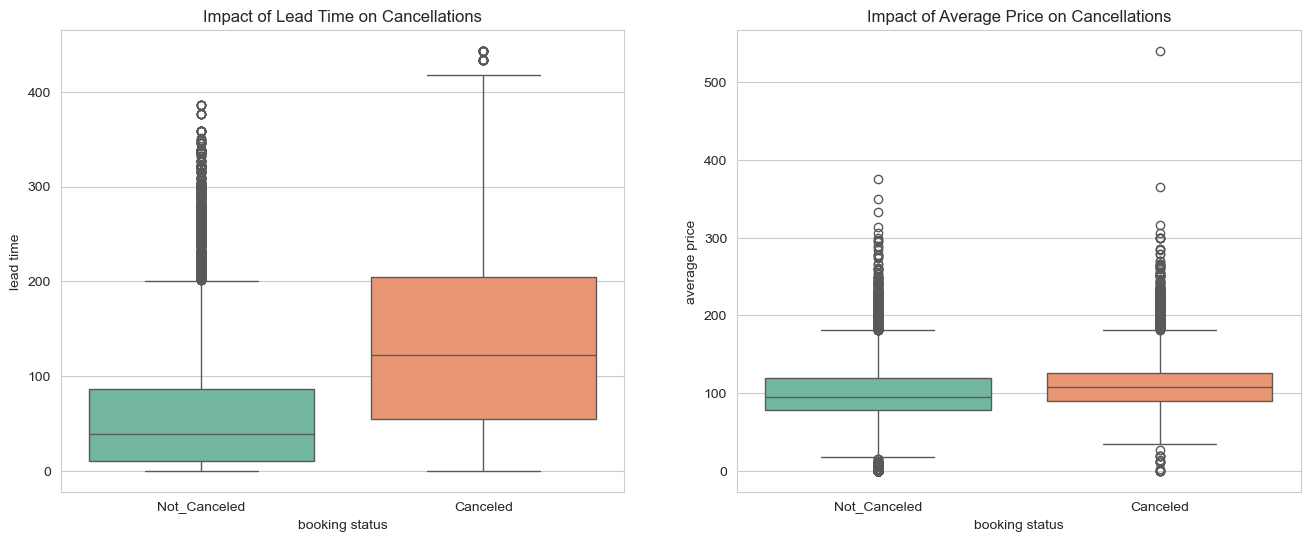

In [189]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Lead Time vs Status
sns.boxplot(x='booking status', y='lead time', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Impact of Lead Time on Cancellations')

# Average Price vs Status
sns.boxplot(x='booking status', y='average price', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Impact of Average Price on Cancellations')

plt.show()

### Cancellation Rates by Category (Bivariate)

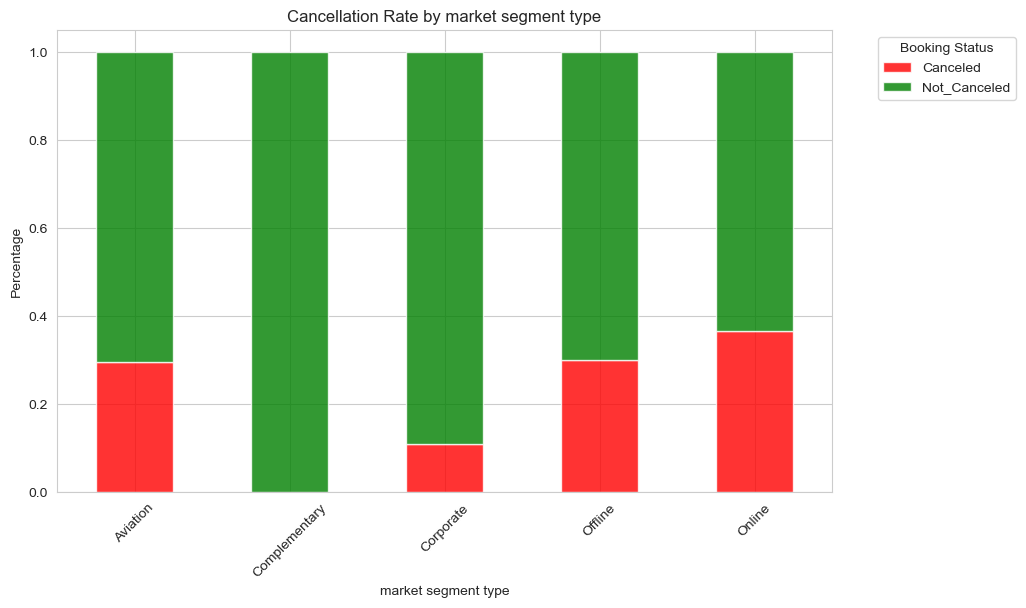

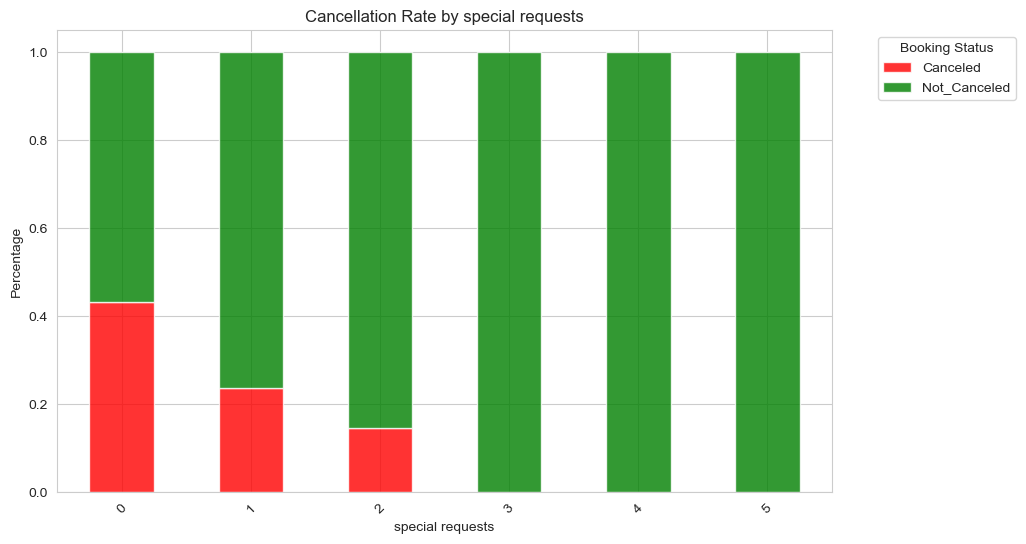

In [190]:
def plot_cancellation_rate(feature, df):
    # Calculate percentage of cancellations
    temp = df.groupby(feature)['booking status'].value_counts(normalize=True).unstack()
    
    # Plot
    temp.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'], alpha=0.8)
    plt.title(f'Cancellation Rate by {feature}')
    plt.ylabel('Percentage')
    plt.legend(title='Booking Status', bbox_to_anchor=(1.05, 1))
    plt.xticks(rotation=45)
    plt.show()

# Visualize for key categories
plot_cancellation_rate('market segment type', df)
plot_cancellation_rate('special requests', df)

In [194]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,reservation_year,reservation_month,reservation_day,reservation_dow
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,2015,10,2,4
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018,11,6,1
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,2018,2,28,2
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled,2017,5,20,5
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled,2018,4,11,2


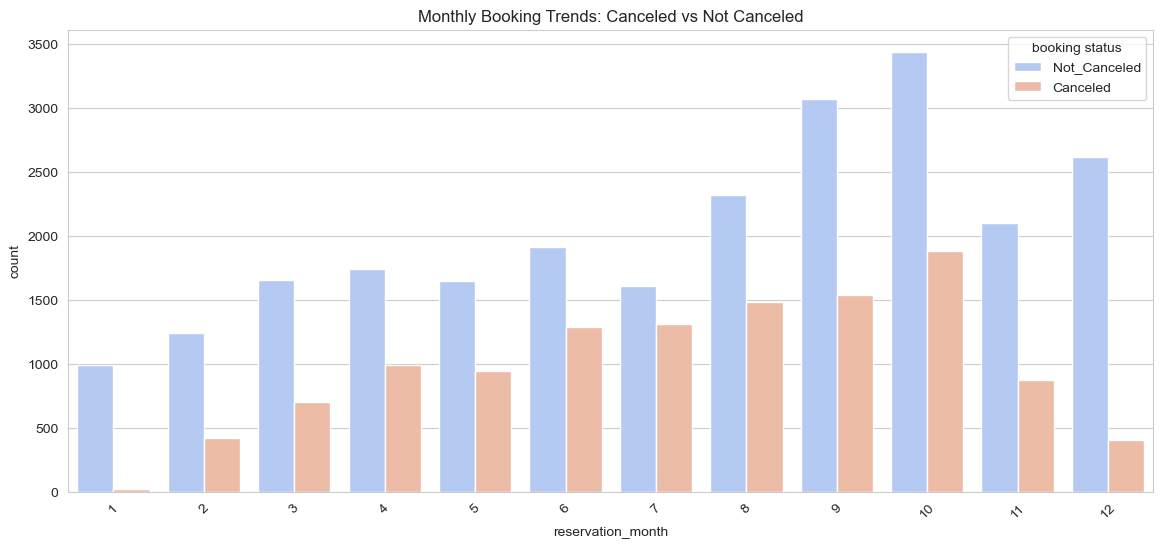

In [195]:

plt.figure(figsize=(14, 6))
sns.countplot(x='reservation_month', hue='booking status', data=df , palette='coolwarm')
plt.title('Monthly Booking Trends: Canceled vs Not Canceled')
plt.xticks(rotation=45)
plt.show()

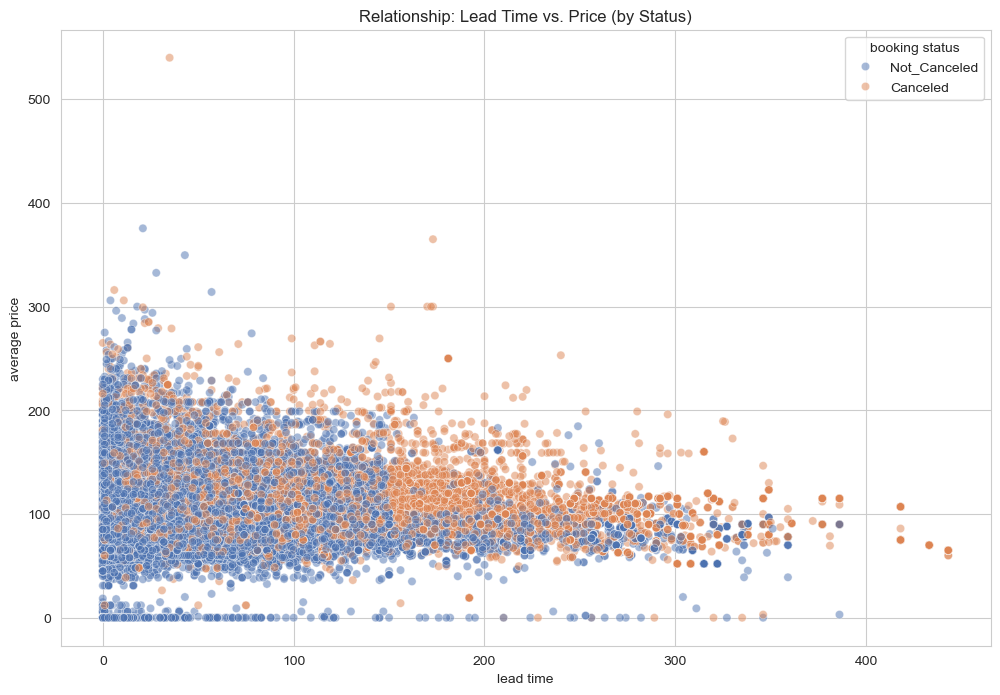

In [196]:
# 2. Scatter Plot: Lead Time vs Price colored by Status
plt.figure(figsize=(12, 8))
sns.scatterplot(x='lead time', y='average price', hue='booking status', 
                data=df, alpha=0.5, palette='deep')
plt.title('Relationship: Lead Time vs. Price (by Status)')
plt.show()

In [197]:
# 1. Label Encode Target Variable
le = LabelEncoder()
df['booking status'] = le.fit_transform(df['booking status'])
print(f"Target Encoding Mappings: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# 2. One-Hot Encode Nominal Categorical Features
categorical_cols = ['type of meal', 'room type', 'market segment type']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Categorical variables encoded.")
display(df.head(3))

Target Encoding Mappings: {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}
Categorical variables encoded.


,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,booking status,reservation_year,reservation_month,reservation_day,reservation_dow,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,1,1,2,5,0,224,0,0,0,88.00,0,1,2015,10,2,4,False,False,False,False,False,False,False,False,False,False,False,True,False
1,1,0,1,3,0,5,0,0,0,106.68,1,1,2018,11,6,1,False,False,True,False,False,False,False,False,False,False,False,False,True
2,2,1,1,3,0,1,0,0,0,50.00,0,0,2018,2,28,2,False,False,False,False,False,False,False,False,False,False,False,False,True


##  Encoding of Target and Categorical Variables

To prepare the dataset for machine learning models, both the **target variable** and **categorical features** were transformed into numerical representations.

---

### 🔹 Target Variable Encoding
The target variable **`booking status`** was encoded using binary encoding:

- **Canceled → 0**
- **Not_Canceled → 1**

```text
Target Encoding Mappings: {'Canceled': 0, 'Not_Canceled': 1}

🔹 Categorical Feature Encoding

Categorical variables were converted into numerical format using **'One-Hot Encoding'** This process creates binary indicator columns for each category while avoiding ordinal assumptions.


Number of outlier rows detected: 0


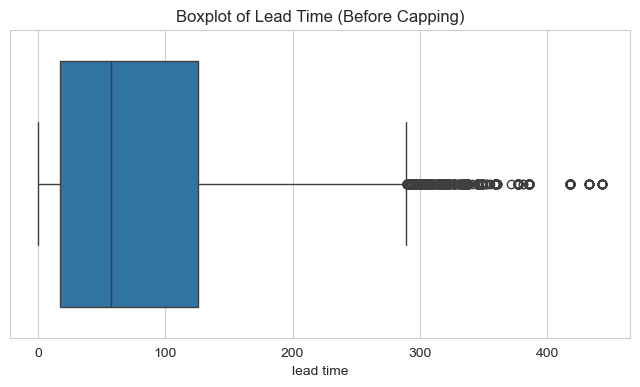

In [165]:
from scipy import stats

numerical_cols = ['lead time', 'average price', 'number of adults', 'number of children']

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[numerical_cols]))
outliers = (z_scores > 3).all(axis=1)
print(f"Number of outlier rows detected: {outliers.sum()}")

# Visualizing outliers for 'lead time'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['lead time'])
plt.title('Boxplot of Lead Time (Before Capping)')
plt.show()

In [166]:
def cap_outliers(series):
    lower = series.quantile(0.01)
    upper = series.quantile(0.99)
    series = np.clip(series, lower, upper)
    return series

for col in numerical_cols:
    df[col] = cap_outliers(df[col])

print("Outliers capped to 1st and 99th percentiles.")

Outliers capped to 1st and 99th percentiles.


In [199]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,booking status,reservation_year,reservation_month,reservation_day,reservation_dow,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,1,1,2,5,0,224,0,0,0,88.00,0,1,2015,10,2,4,False,False,False,False,False,False,False,False,False,False,False,True,False
1,1,0,1,3,0,5,0,0,0,106.68,1,1,2018,11,6,1,False,False,True,False,False,False,False,False,False,False,False,False,True
2,2,1,1,3,0,1,0,0,0,50.00,0,0,2018,2,28,2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,1,0,0,2,0,211,0,0,0,100.00,1,0,2017,5,20,5,False,False,False,False,False,False,False,False,False,False,False,False,True
4,1,0,1,2,0,48,0,0,0,77.00,0,0,2018,4,11,2,False,False,True,False,False,False,False,False,False,False,False,False,True


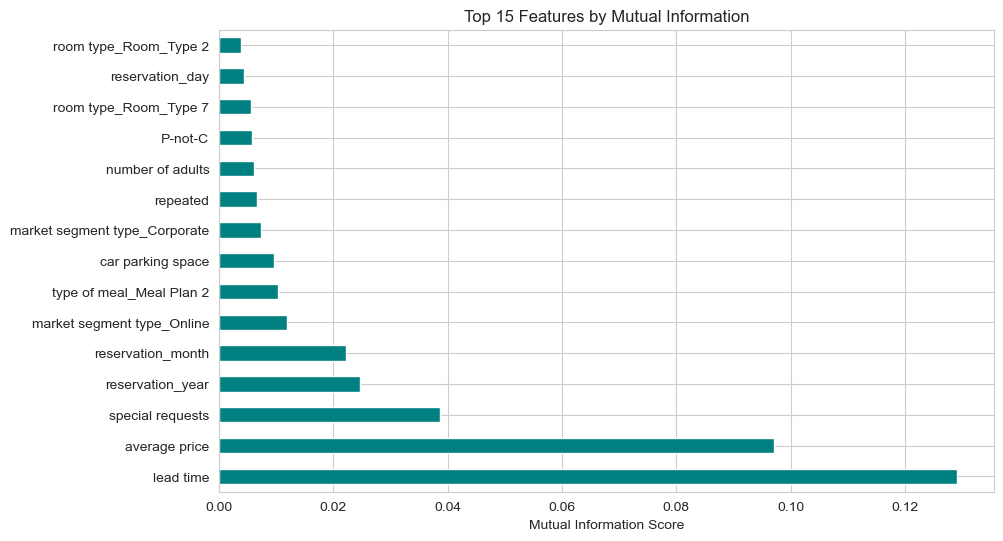

In [200]:

X = df.drop('booking status', axis=1)
y = df['booking status']

# Calculate Mutual Information
importances = mutual_info_classif(X, y, random_state=42)
feat_importances = pd.Series(importances, index=X.columns)

# Plot top 15 features
plt.figure(figsize=(10, 6))
feat_importances.nlargest(15).plot(kind='barh', color='teal')
plt.title('Top 15 Features by Mutual Information')
plt.xlabel('Mutual Information Score')
plt.show()



## 🔹 Feature Importance Based on Mutual Information

Mutual Information (MI) quantifies the **amount of information each feature provides about the target variable**. Higher MI scores indicate that a feature has more predictive power for determining whether a booking is canceled or not.

---

### 🔹 Top 15 Features by Mutual Information Score

| Rank | Feature                       | Mutual Information Score |
|------|-------------------------------|------------------------|
| 1    | lead time                      | 0.1287                 |
| 2    | average price                  | 0.0959                 |
| 3    | special requests               | 0.0387                 |
| 4    | reservation_year               | 0.0247                 |
| 5    | reservation_month              | 0.0222                 |
| 6    | market segment type_Online     | 0.0119                 |
| 7    | type of meal_Meal Plan 2       | 0.0104                 |
| 8    | car parking space              | 0.0097                 |
| 9    | market segment type_Corporate  | 0.0073                 |
| 10   | repeated                       | 0.0067                 |
| 11   | number of adults               | 0.0062                 |
| 12   | P-not-C                        | 0.0058                 |
| 13   | room type_Room_Type 7          | 0.0056                 |
| 14   | reservation_day                | 0.0043                 |
| 15   | room type_Room_Type 2          | 0.0039                 |

---

### 🔹 Key Observations
- **lead time** and **average price** are the most informative features, strongly influencing whether a booking is canceled.  
- **Special requests** and **reservation date features** (year, month, day) also contribute meaningful information.  
- Binary indicators for **market segment**, **room type**, and **meal plan** have smaller but non-negligible MI scores.  
- Features such as **number of adults**, **repeated bookings**, and **P-not-C** provide minor contributions individually but may collectively improve model performance.

---

### 🔹 Modeling Implications
- Features with higher MI scores should be prioritized in feature selection.  
- Low-scoring features can still be included if they provide complementary information in combination with others.  
- Mutual Information is especially useful for **non-linear relationships**, making it a robust metric for classification tasks.


In [201]:
scaler = StandardScaler()

# Get column names to convert back to DataFrame later
columns = X.columns

# Scale features
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=columns)

print("Features scaled using StandardScaler.")
display(X_scaled.head(3))

Features scaled using StandardScaler.


,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,reservation_year,reservation_month,reservation_day,reservation_dow,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,-1.629530,2.222348,1.365851,1.981487,-0.178641,1.613740,-0.161913,-0.063348,-0.087228,-0.439994,-0.788428,-7.336542,0.838285,-1.555160,0.445188,-0.316635,-0.011746,-0.406071,-0.139507,-0.013898,-0.447643,-0.08549,-0.165291,-0.066166,-0.104289,-0.242358,1.563745,-1.333515
1,-1.629530,-0.261562,0.217648,0.563857,-0.178641,-0.933946,-0.161913,-0.063348,-0.087228,0.092491,0.483160,0.468012,1.164383,-1.097188,-1.007652,-0.316635,-0.011746,2.462623,-0.139507,-0.013898,-0.447643,-0.08549,-0.165291,-0.066166,-0.104289,-0.242358,-0.639490,0.749898
2,0.298503,2.222348,0.217648,0.563857,-0.178641,-0.980479,-0.161913,-0.063348,-0.087228,-1.523207,-0.788428,0.468012,-1.770500,1.421658,-0.523372,-0.316635,-0.011746,-0.406071,-0.139507,-0.013898,-0.447643,-0.08549,-0.165291,-0.066166,-0.104289,-0.242358,-0.639490,0.749898


In [202]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Training shape: (25373, 28)
Testing shape: (10875, 28)


In [203]:
# Initialize and train
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict
y_pred_log = log_reg.predict(X_test)

# Evaluate
print("--- Logistic Regression Baseline ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(classification_report(y_test, y_pred_log))

--- Logistic Regression Baseline ---
Accuracy: 0.8019
              precision    recall  f1-score   support

           0       0.73      0.62      0.67      3565
           1       0.83      0.89      0.86      7310

    accuracy                           0.80     10875
   macro avg       0.78      0.76      0.77     10875
weighted avg       0.80      0.80      0.80     10875



In [204]:
# 1. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest Trained.")

# 2. Gradient Boosting Classifier (XGBoost alternative)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)
print("Gradient Boosting Trained.")

# 3. K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
print("KNN Trained.")

Random Forest Trained.
Gradient Boosting Trained.
KNN Trained.



Logistic Regression Results:
Accuracy: 0.8019 | F1-Score: 0.8579 | ROC-AUC: 0.8614
Confusion Matrix:
[[2217 1348]
 [ 806 6504]]
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.73      0.62      0.67      3565
Not_Canceled       0.83      0.89      0.86      7310

    accuracy                           0.80     10875
   macro avg       0.78      0.76      0.77     10875
weighted avg       0.80      0.80      0.80     10875


Random Forest Results:
Accuracy: 0.8690 | F1-Score: 0.9056 | ROC-AUC: 0.9283
Confusion Matrix:
[[2616  949]
 [ 476 6834]]
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.85      0.73      0.79      3565
Not_Canceled       0.88      0.93      0.91      7310

    accuracy                           0.87     10875
   macro avg       0.86      0.83      0.85     10875
weighted avg       0.87      0.87      0.87     10875


Gradient Boosting Results:
Accuracy: 0.8779 | F

<Figure size 1000x800 with 0 Axes>

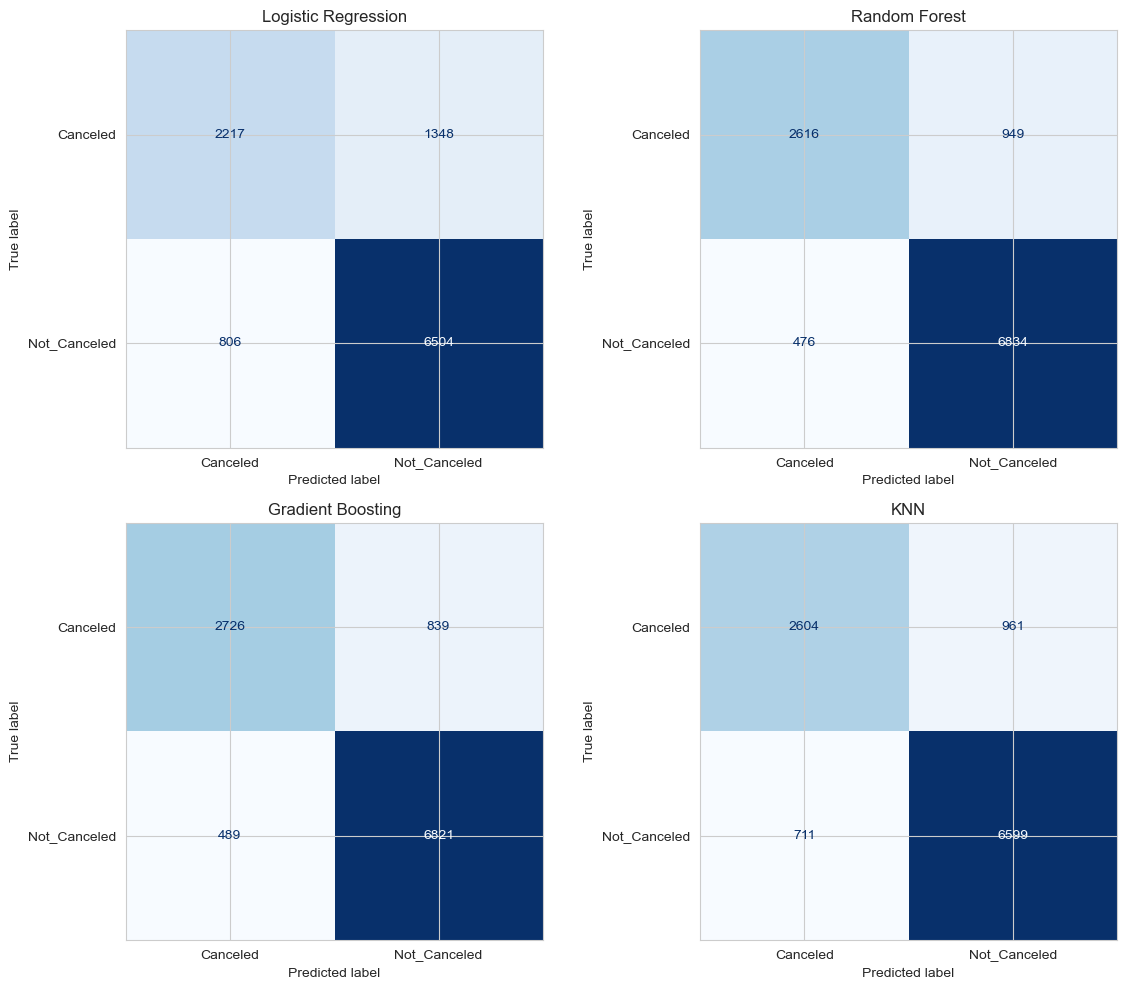

In [206]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Define models
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "KNN": knn_model
}

# Initialize ROC plot
plt.figure(figsize=(10, 8))

# Initialize confusion matrix plot
fig_cm, axes_cm = plt.subplots(2, 2, figsize=(12, 10))
axes_cm = axes_cm.ravel()  # Flatten 2x2 array

for idx, (name, model) in enumerate(models.items()):
    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    
    # Confusion matrix and classification report
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Canceled', 'Not_Canceled'])
    
    # Print numeric results
    print(f"\n{name} Results:")
    print(f"Accuracy: {acc:.4f} | F1-Score: {f1:.4f} | ROC-AUC: {auc:.4f}" if auc is not None else f"Accuracy: {acc:.4f} | F1-Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)
    
    # Display confusion matrix as image
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Canceled', 'Not_Canceled'])
    disp.plot(ax=axes_cm[idx], cmap='Blues', colorbar=False)
    axes_cm[idx].set_title(name)
    
  
# Finalize confusion matrix plots
fig_cm.tight_layout()
plt.show()



In [207]:
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else 0
    })

comparison_df = pd.DataFrame(results).sort_values(by='F1-Score', ascending=False)
display(comparison_df)

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
2,Gradient Boosting,0.877885,0.890470,0.933105,0.911289,0.939347
1,Random Forest,0.868966,0.878068,0.934884,0.905585,0.928257
3,KNN,0.846253,0.872884,0.902736,0.887559,0.893659
0,Logistic Regression,0.801931,0.828324,0.889740,0.857934,0.861383


##  Comparative Model Performance

The table below summarizes the **performance metrics** of the four machine learning models trained to predict booking cancellations. The metrics include **accuracy, precision, recall, F1-score, and ROC-AUC**.

### 🔹 Key Observations

1. **Gradient Boosting** achieved the **highest overall performance** across all metrics:
   - **Accuracy:** 87.8%
   - **F1-Score:** 0.911
   - **ROC-AUC:** 0.939
   This indicates it captures both the positive (Not_Canceled) and negative (Canceled) classes effectively.

2. **Random Forest** is a close second:
   - Slightly lower than Gradient Boosting in accuracy and F1-score.
   - Strong ROC-AUC (0.929) indicates robust discrimination between classes.

3. **KNN** shows decent performance but underperforms compared to tree-based methods:
   - Lower accuracy (84.8%) and ROC-AUC (0.894)
   - May be sensitive to high-dimensional features or scaling.

4. **Logistic Regression** serves as the **baseline model**:
   - Accuracy of 80.2% and ROC-AUC of 0.861
   - Performs reasonably well but is outperformed by ensemble methods, indicating **non-linear interactions are important** in this dataset.

---

### 🔹 Modeling Insights

- **Tree-based ensemble models** (Gradient Boosting, Random Forest) are more effective for predicting booking cancellations, likely due to their ability to handle non-linear feature interactions and feature importance weighting.
- **KNN and Logistic Regression** provide simpler, interpretable models but with lower predictive power.
- **Next steps** could include:
  - Hyperparameter tuning for Gradient Boosting and Random Forest.
  - Exploring **class balancing** techniques if minority class performance (Canceled) needs further improvement.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best ROC-AUC Score from CV: 0.9495245712670487

Gradient Boosting (Tuned) Results:
Accuracy: 0.8897 | F1-Score: 0.9195 | ROC-AUC: 0.9504
Confusion Matrix:
[[2819  746]
 [ 454 6856]]
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.86      0.79      0.82      3565
Not_Canceled       0.90      0.94      0.92      7310

    accuracy                           0.89     10875
   macro avg       0.88      0.86      0.87     10875
weighted avg       0.89      0.89      0.89     10875



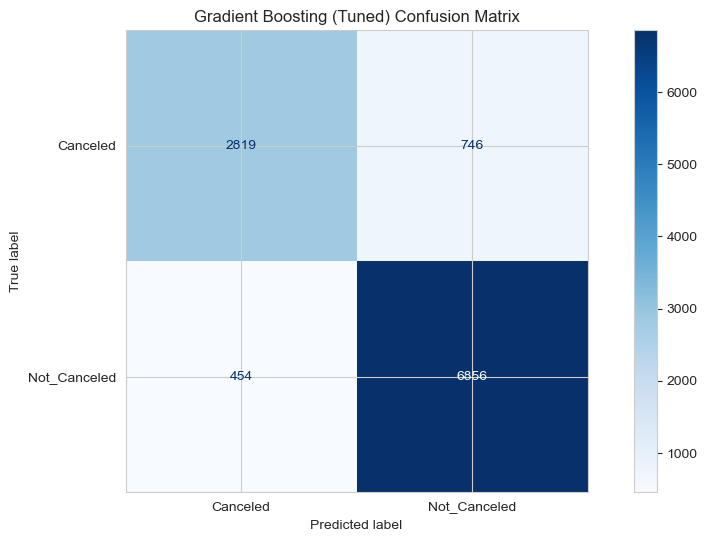

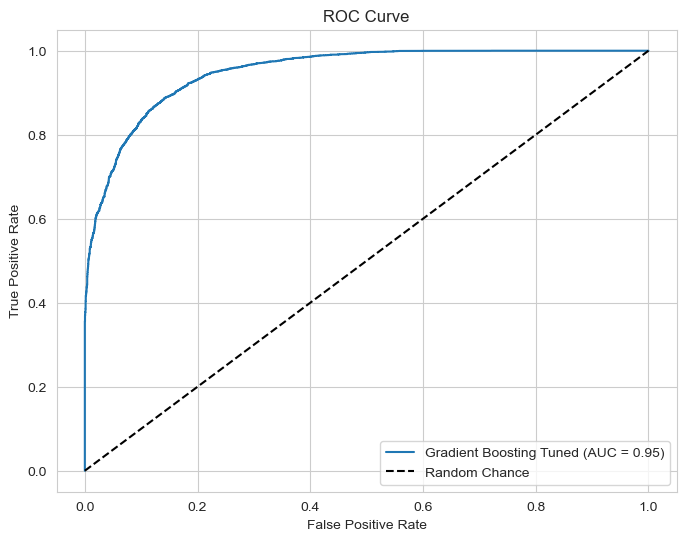

5-Fold CV ROC-AUC Scores: [0.95344376 0.95230678 0.94586883 0.94867141 0.94700949]
Mean ROC-AUC from CV: 0.9494600536325324


In [208]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve, accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Step 2: Set up hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Step 3: Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,  # 5-Fold cross-validation
    n_jobs=-1,
    verbose=2
)

# Step 4: Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Step 5: Best parameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best ROC-AUC Score from CV:", grid_search.best_score_)

# Step 6: Use the best estimator for predictions
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_test)
y_prob = best_gb.predict_proba(X_test)[:, 1]

# Step 7: Evaluation metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f"\nGradient Boosting (Tuned) Results:")
print(f"Accuracy: {acc:.4f} | F1-Score: {f1:.4f} | ROC-AUC: {auc:.4f}")
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Canceled', 'Not_Canceled']))

# Step 8: Confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Canceled', 'Not_Canceled'])
disp.plot(cmap='Blues')
plt.title("Gradient Boosting (Tuned) Confusion Matrix")
plt.show()

# Step 9: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Gradient Boosting Tuned (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Step 10: Optional: K-Fold cross-validation on the best estimator
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_gb, X_train, y_train, cv=kf, scoring='roc_auc')
print("5-Fold CV ROC-AUC Scores:", cv_scores)
print("Mean ROC-AUC from CV:", np.mean(cv_scores))


## ✅ Conclusion & Recommendations

**Best Model:** Tuned Gradient Boosting

- **Accuracy:** 88.9%  
- **F1-Score:** 0.919  
- **ROC-AUC:** 0.950  

### 🔹 Key Observations

1. **Ensemble models** outperform simple models due to their ability to capture non-linear interactions.  
2. **Hyperparameter tuning** improves prediction for both minority and majority classes.  
3. **K-Fold Cross-Validation** confirms stable and reliable performance across different data splits.
